 
* **Company** - *String* - Laptop Manufacturer
* **Product** - *String* - Brand and Model
* **TypeName** - *String* - Type (Notebook, Ultrabook, Gaming, etc.)
* **Inches** - *Numeric* - Screen Size
* **ScreenResolution** - *String* - Screen Resolution
* **Cpu** - *String* - Central Processing Unit (CPU)
* **Ram** - *String* - Laptop RAM
* **Memory** - *String* - Hard Disk / SSD Memory
* **GPU** - *String* - Graphics Processing Units (GPU)
* **OpSys** - *String* - Operating System
* **Weight** - *String* - Laptop Weight
* **Price_euros** - *Numeric* - Price (Euro)


In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 16, 10 

In [3]:
!ls

laptop_price.csv notebook.ipynb


In [4]:
df = pd.read_csv('laptop_price.csv', encoding = "ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## preparation dataset to one style

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [7]:
df = df.drop('laptop_id', axis=1)
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower()

## EDA

In [9]:
# Chech missing values.
df.isnull().sum()

company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

In [10]:
# Count unique number for each categorical features.
df[categorical_columns].nunique()

company              19
product             576
typename              6
screenresolution     40
cpu                 116
ram                   9
memory               39
gpu                 110
opsys                 9
weight              179
dtype: int64

In [11]:
print(df.shape[0])
(df[categorical_columns].nunique() / len(df) * 100).round(2)

1303


company              1.46
product             44.21
typename             0.46
screenresolution     3.07
cpu                  8.90
ram                  0.69
memory               2.99
gpu                  8.44
opsys                0.69
weight              13.74
dtype: float64

Rows count in our dataset `df` are 1303. We can see that `product` has big percent unique values. 

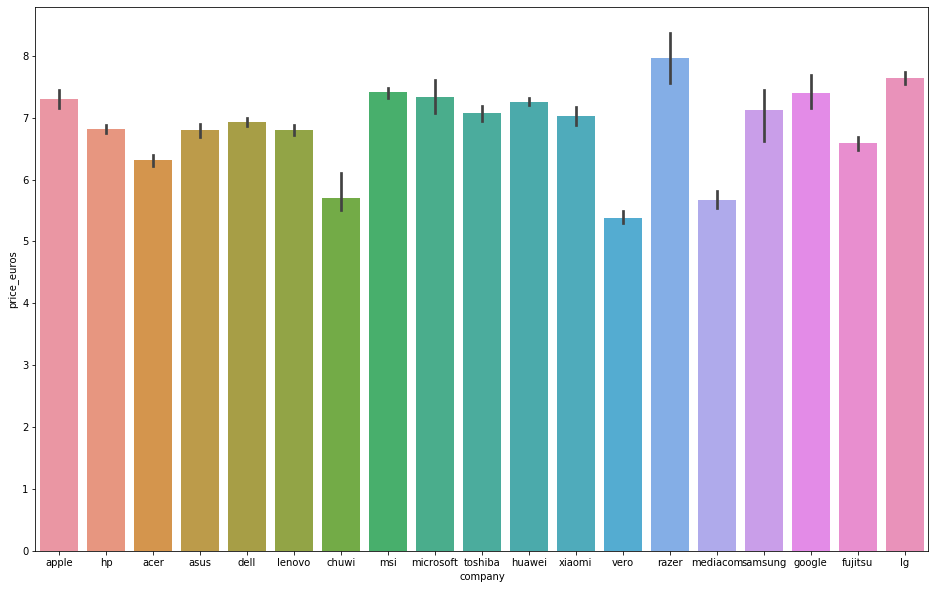

In [23]:
sns.barplot(x=df['company'], y=np.log(df['price_euros']))
plt.show()

## Feature generation

In [14]:
df.loc[:, 'weight'].apply(lambda x: float(x[:-2]))

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: weight, Length: 1303, dtype: float64

In [15]:
df.loc[:, 'weight'] = df.loc[:, 'weight'].apply(lambda x: float(x[:-2]))
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37,1339.69
1,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34,898.94
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86,575.00
3,apple,macbook pro,ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83,2537.45
4,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,lenovo,yoga 500-14isk,2 in 1 convertible,14.0,ips panel full hd / touchscreen 1920x1080,intel core i7 6500u 2.5ghz,4gb,128gb ssd,intel hd graphics 520,windows 10,1.80,638.00
1299,lenovo,yoga 900-13isk,2 in 1 convertible,13.3,ips panel quad hd+ / touchscreen 3200x1800,intel core i7 6500u 2.5ghz,16gb,512gb ssd,intel hd graphics 520,windows 10,1.30,1499.00
1300,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2gb,64gb flash storage,intel hd graphics,windows 10,1.50,229.00
1301,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel core i7 6500u 2.5ghz,6gb,1tb hdd,amd radeon r5 m330,windows 10,2.19,764.00


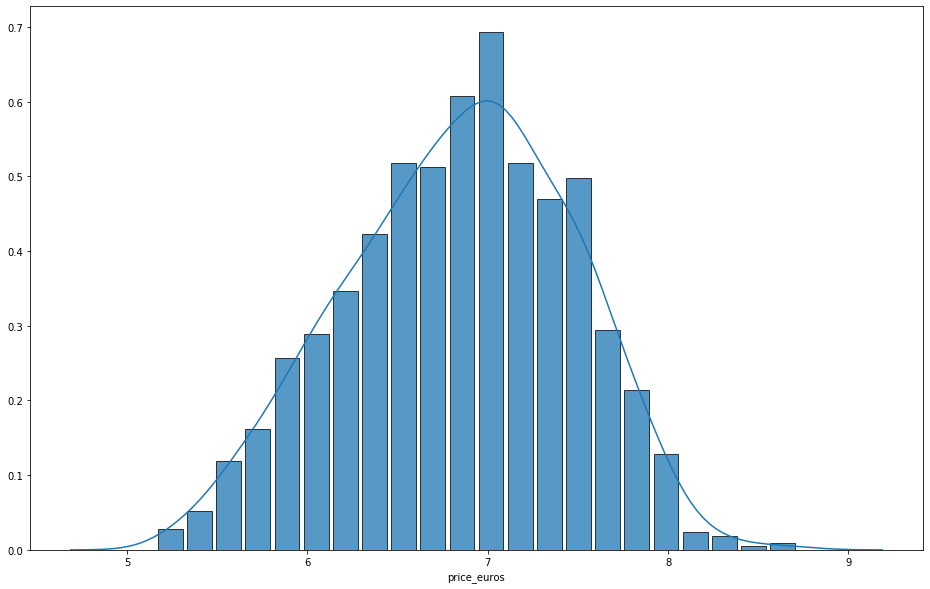

In [16]:
sns.distplot(np.log(df['price_euros']), hist_kws={'rwidth':0.85, 'edgecolor':'black', 'alpha':0.75})

In [17]:
df['ram'].value_counts()

8gb     619
4gb     375
16gb    200
6gb      41
12gb     25
2gb      22
32gb     17
24gb      3
64gb      1
Name: ram, dtype: int64

In [18]:
df[df['company'] == 'huawei']

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
170,huawei,matebook x,ultrabook,13.0,ips panel full hd 2160x1440,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,windows 10,1.05,1349.0
214,huawei,matebook x,ultrabook,13.0,ips panel full hd 2160x1440,intel core i7 7500u 2.7ghz,8gb,512gb ssd,intel hd graphics 620,windows 10,1.05,1499.0
